In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

## Data Overview

In [2]:
data_raw = pd.read_csv('students_test_scores.csv')
data_raw.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
data_raw.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

**There is no missing data.**

In [4]:
data_raw.columns.values

array(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'], dtype=object)

In [5]:
data_raw.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


## Drop unneccessary features

In [6]:
df = data_raw.copy()
df = df.drop('student_id',axis=1) # student id can be dropped, as the index provides a unique identifier
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0


## Create dummy variables for categorical variables

In [7]:
df.school.unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

In [8]:
schools = pd.get_dummies(df.school, drop_first = True)
schools.head()

,CCAAW,CIMBB,CUQAM,DNQDD,FBUMG,GJJHK,GOKXL,GOOBU,IDGFP,KFZMY,...,OJOBU,QOQTS,UAGPU,UKPGS,UUUQX,VHDHF,VKWQH,VVTVA,ZMNYA,ZOWMK
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
room = pd.get_dummies(df.classroom, drop_first = True)
room.head()

,08N,0N7,18K,197,1Q1,1SZ,1UU,1VD,21Q,2AP,...,XJ8,XXE,XXJ,XZ4,XZM,YTB,YUC,ZBH,ZDT,ZNS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Because there are so many different schools and classrooms, I will create two variables that contain school and classroom information as dummy variables to keep the information, in case we want to add them to the model later. I will drop the features from the dataframe to keep the data concise and check the model's accuracy without the school and classroom information.**

In [10]:
df = df.drop(['school','classroom'],axis=1)

In [11]:
df.school_setting.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
df.teaching_method.unique()

array(['Standard', 'Experimental'], dtype=object)

In [13]:
df.lunch.unique()

array(['Does not qualify', 'Qualifies for reduced/free lunch'],
      dtype=object)

In [14]:
df.school_type.unique()

array(['Non-public', 'Public'], dtype=object)

In [15]:
df.teaching_method = df.teaching_method.map({'Standard':1, 'Experimental':0})
df.gender = df.gender.map({'Female':1,'Male':0})
df.lunch = df.lunch.map({"Does not qualify":0, "Qualifies for reduced/free lunch":1})
df.school_type = df.school_type.map({'Public':1, 'Non-public': 0})
df.school_setting = df.school_setting.map({'Urban': 0,'Suburban': 1, 'Rural': 2})

In [16]:
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,0,1,20.0,1,0,62.0,72.0
1,0,0,1,20.0,1,0,66.0,79.0
2,0,0,1,20.0,0,0,64.0,76.0
3,0,0,1,20.0,1,0,61.0,77.0
4,0,0,1,20.0,0,0,64.0,76.0


## Visual inspection of the features and their relationships

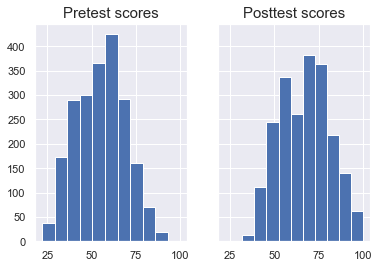

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True,sharex=True)
ax1.hist(df.pretest)
ax1.set_title('Pretest scores',size=15)
ax2.hist(df.posttest)
ax2.set_title('Posttest scores',size=15)
plt.show()

Text(0.5, 1.0, 'Number of students per class')

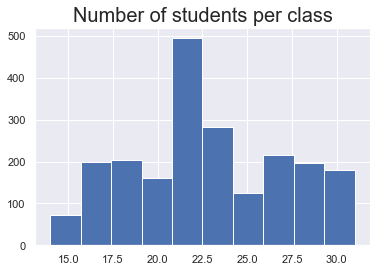

In [18]:
plt.hist(df.n_student)
plt.title('Number of students per class',size=20)

From the Numerical data we can see that the number of students per class varies between 14 and 31 students. With an average of ~23 students per class (standard deviation = 4.23).

Pre-test scores range between 22 and 93 with an average of ~55 percent (std = 13.56). The data seems to be normally distributed.
Post-test scores range between 32 and 100, with an average of ~67% (std = 13.99). The data seems to be normally distributed.

**Because number of students and pretest scores are of a different magnitude (average pre-test scores roughly twice the average #students), the numerical data should be standardized before fitting the model.**

<AxesSubplot:xlabel='gender', ylabel='pretest'>

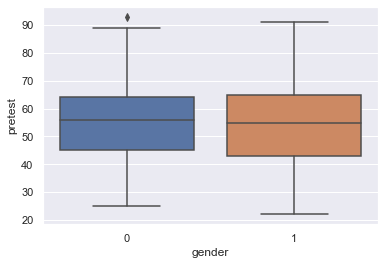

In [19]:
sns.boxplot(x='gender',y='pretest',data=df)

<AxesSubplot:xlabel='gender', ylabel='posttest'>

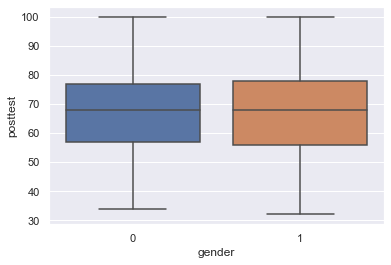

In [20]:
sns.boxplot(x='gender',y='posttest',data=df)

**There doesn't seem to be a gender effect for either pre-test or post-test scores.**

## Checking assumptions

### Linearity

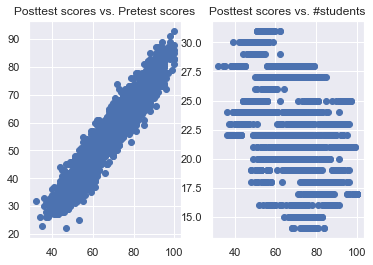

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True)
ax1.scatter(df.posttest,df.pretest)
ax1.set_title('Posttest scores vs. Pretest scores')
ax2.scatter(df.posttest,df.n_student)
ax2.set_title('Posttest scores vs. #students')
plt.show()

**There seems to be a linear relationship between the continuous input variables "Pre-test" and "number of students" and the target variable "post-test".**

### Homoscedasticity

**The scatter plots do not display a cone shaped distribution, which could indicate homoscedasticity. Therefore the assumption of equal variance holds.**

### Multicollinearity (VIF)

In [22]:
variables = df[['pretest','n_student']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,7.698536,pretest
1,7.698536,n_student


**The variance inflation factor for both features exceeds 5, but remains below 10. These values can be considered borderline, but not unacceptably high.**

## Scaling the data

In [95]:
target = df.posttest
inputs = df.drop('posttest',axis=1)
to_scale = pd.concat([df.n_student,df.school_setting,df.pretest],axis=1)

Only the continuous variables need to be scaled.

In [96]:
scaler = StandardScaler()
scaler.fit(to_scale)
scaled = scaler.transform(to_scale) # this creates an array that we need to turn back into a dataframe
scaled_inputs = pd.DataFrame(data=scaled,columns=['n_student','school_setting','pretest'])

In [97]:
inputs = inputs.drop(['n_student','school_setting','pretest'],axis=1)
inputs = pd.concat([inputs,scaled_inputs],axis=1)

In [98]:
inputs.head()

,school_type,teaching_method,gender,lunch,n_student,school_setting,pretest
0,0,1,1,0,-0.661447,-1.02648,0.519477
1,0,1,1,0,-0.661447,-1.02648,0.814464
2,0,1,0,0,-0.661447,-1.02648,0.666971
3,0,1,1,0,-0.661447,-1.02648,0.445730
4,0,1,0,0,-0.661447,-1.02648,0.666971


## Train Test Split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

## Create Regression Model

In [100]:
reg = LinearRegression()
reg.fit(x_train, y_train)
yhat = reg.predict(x_train) # predictions made by the model

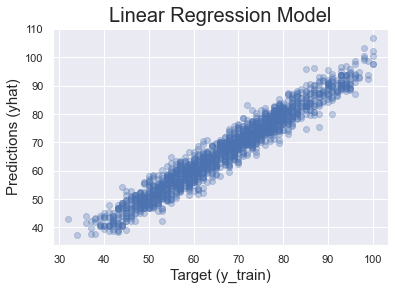

In [101]:
plt.scatter(y_train, yhat, alpha = 0.3)
plt.title('Linear Regression Model', size=20)
plt.xlabel('Target (y_train)', size=15)
plt.ylabel('Predictions (yhat)',size=15)
plt.show()

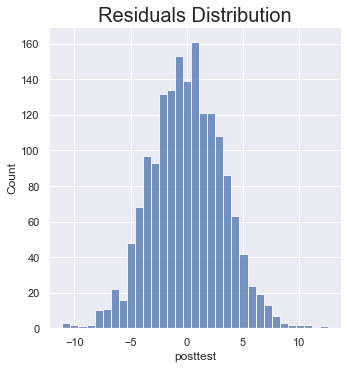

In [102]:
sns.displot(y_train-yhat)
plt.title('Residuals Distribution',size=20)
plt.show()

## Model Summary

In [103]:
reg.score(x_train,y_train)

0.9470511450324585

**The model explains about 94.7% of variability.**

In [104]:
reg.intercept_

71.13293838204933

In [105]:
summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
summary['Weights'] = reg.coef_
summary.sort_values(by=['Weights'], ascending=False)

,Features,Weights
6,pretest,12.594305
2,gender,0.110348
0,school_type,0.079972
5,school_setting,-0.001470
4,n_student,-0.366236
3,lunch,-0.612669
1,teaching_method,-6.017233


**"School_type" and "school_setting" have weigths very close to 0. This means these two features have a negligable contribution to the model and should therefore not be included in the model.**

## Re-run the model without unnecessary features

In [106]:
inputs = inputs.drop(['school_type','school_setting'],axis=1)
inputs.head()

,teaching_method,gender,lunch,n_student,pretest
0,1,1,0,-0.661447,0.519477
1,1,1,0,-0.661447,0.814464
2,1,0,0,-0.661447,0.666971
3,1,1,0,-0.661447,0.445730
4,1,0,0,-0.661447,0.666971


In [107]:
target.head()

0    72.0
1    79.0
2    76.0
3    77.0
4    76.0
Name: posttest, dtype: float64

In [108]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

## Create Regression Model

In [109]:
reg = LinearRegression()
reg.fit(x_train, y_train)
yhat = reg.predict(x_train) # predictions made by the model

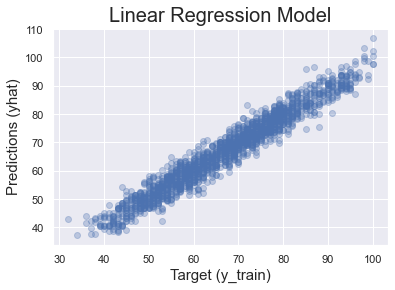

In [110]:
plt.scatter(y_train, yhat, alpha = 0.3)
plt.title('Linear Regression Model', size=20)
plt.xlabel('Target (y_train)', size=15)
plt.ylabel('Predictions (yhat)',size=15)
plt.show()

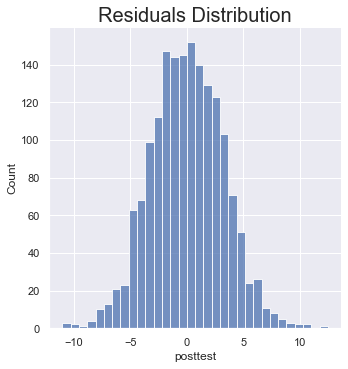

In [111]:
sns.displot(y_train-yhat)
plt.title('Residuals Distribution',size=20)
plt.show()

## Model Summary

In [112]:
reg.score(x_train,y_train)

0.9470470369604963

**The updated model still explains about 94.7% of variability. This shows again that the two dropped features did not provide a significant contribution to the model.**

In [113]:
reg.intercept_

71.19373117924249

In [114]:
summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
summary['Weights'] = reg.coef_
summary.sort_values(by=['Weights'], ascending=False)

,Features,Weights
4,pretest,12.587815
1,gender,0.108497
3,n_student,-0.347709
2,lunch,-0.623121
0,teaching_method,-6.011878


**The Weights show that pre-test scores seem to be the bes predictor of post-test scores, with a positive relationship. The higher the pre-test score, the higher the predicted post-test score.**

**The feature with the second largest effect is "teaching_method", with a negaive relationship. This feature is a categorical variable with 1='Standard teaching method' and 0 = 'Experimental teaching method'. This can be interpreted that students taught with the "Experimental teaching method" are predicted to score higher on the post-test.**

## Test the model

In [115]:
yhat_test = reg.predict(x_test)

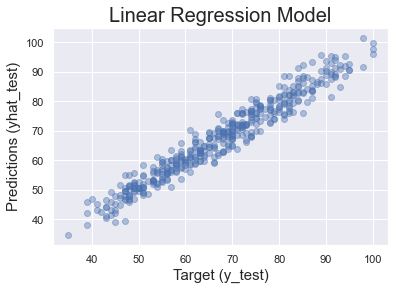

In [117]:
plt.scatter(y_test,yhat_test,alpha = 0.4)
plt.title('Linear Regression Model', size=20)
plt.xlabel('Target (y_test)', size=15)
plt.ylabel('Predictions (yhat_test)', size=15)
plt.show()

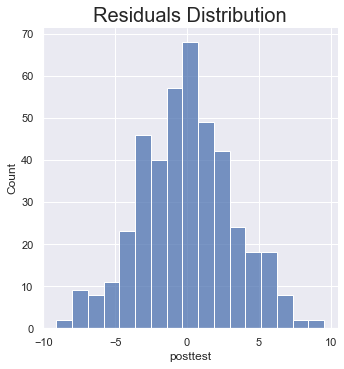

In [118]:
sns.displot(y_test-yhat_test)
plt.title('Residuals Distribution',size=20)
plt.show()

The scatter plot as well as the distribution of residuals shows that the model is able to predict post-test scores equally well across the full range.

In [119]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    68.0
1    87.0
2    70.0
3    61.0
4    63.0
Name: posttest, dtype: float64

In [133]:
df_pf = pd.DataFrame(yhat_test.round(1), columns=['Predictions'])

In [137]:
df_pf = pd.concat([df_pf.Predictions,y_test],axis=1)
df_pf.columns = ['Predictions','Targets']
df_pf['Residuals'] = df_pf.Targets - df_pf.Predictions
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100).round(2) # absolute value because it doesn't matter if off by +1% or -1%
df_pf.head()

,Predictions,Targets,Residuals,Difference%
0,62.9,68.0,5.1,7.50
1,85.1,87.0,1.9,2.18
2,72.3,70.0,-2.3,3.29
3,61.1,61.0,-0.1,0.16
4,62.5,63.0,0.5,0.79


In [139]:
df_pf.sort_values(by='Difference%', ascending=False)

,Predictions,Targets,Residuals,Difference%
137,45.9,39.0,-6.9,17.69
96,46.9,40.0,-6.9,17.25
161,54.8,47.0,-7.8,16.60
186,39.5,47.0,7.5,15.96
100,70.1,61.0,-9.1,14.92
...,...,...,...,...
297,60.0,60.0,0.0,0.00
215,63.0,63.0,0.0,0.00
206,70.0,70.0,0.0,0.00
198,72.0,72.0,0.0,0.00


In [147]:
summary.sort_values(by='Weights',ascending=False)

,Features,Weights
4,pretest,12.587815
1,gender,0.108497
3,n_student,-0.347709
2,lunch,-0.623121
0,teaching_method,-6.011878


In [148]:
reg.score(x_test,y_test)

0.9470837446972276

### Overall, this model performs excellent, being able to explain ~95% of variability. The best predictors of post-test scores are Pre-test scores and teaching method.